In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

### XGBoost (Extreme Gradient Boosting)

**XGBoost** is an optimized implementation of the gradient boosting algorithm, primarily used for classification and regression tasks. It builds an ensemble of decision trees where each new tree corrects the errors of the previous ones. Key features include:

- **Speed and Efficiency**: XGBoost is fast due to parallelization and can handle large datasets.
- **Regularization**: Built-in L1 and L2 regularization to reduce overfitting.
- **Missing Data Handling**: Can automatically deal with missing values.
- **Flexibility**: Works well for various tasks, including regression, classification, and ranking.
- **Hyperparameter Tuning**: Key parameters like `learning_rate`, `max_depth`, and `n_estimators` allow fine-tuning for better performance.

XGBoost is popular due to its high accuracy and robustness in real-world data science applications.


In [10]:
iris = load_iris()
X = iris.data
y = iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(
    n_estimators=100,      
    learning_rate=0.1,     
    max_depth=3,          
    random_state=42       
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy",accuracy)

Accuracy 1.0


In [12]:
y[0]

0

## DBScan
It is a density based clustering algorithm. It differentiates between dense areas with the help of sparse regions. It does that by using 2 hyperparameters, epsilon and minpoints. Epsilon is the radius of the cluster and minpoints defines the minimum number of points required for that cluster to be called dense. It has three types of points, which are:-

Core point - A point having atleast minpoints points inside its epsilon circle.
Border point - A point having less than min points inside its epslon cirlce but has a core point in its circle.
Noise point - A point which is neither of the above.

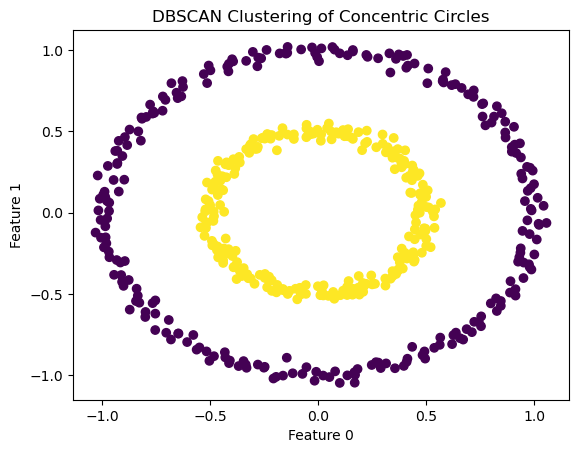

In [13]:
X, _ = make_circles(n_samples=500, factor=.5, noise=.03, random_state=4)

dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering of Concentric Circles")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### Imbalanced Dataset

An **imbalanced dataset** occurs when the classes in a classification problem are not evenly distributed. One class has significantly more instances than the others, leading to potential bias in model performance.

#### Key Characteristics:
- **Uneven Class Distribution**: One class has many more samples than others.
- **Model Bias**: The model may focus on the majority class, neglecting the minority class.

#### Problems:
- **Poor Performance on Minority Class**: The model may fail to correctly predict the minority class.
- **Misleading Accuracy**: High accuracy but poor detection of the minority class.

#### Solutions:
1. **Resampling**:
   - **Oversampling**: Increase minority class samples (e.g., SMOTE).
   - **Undersampling**: Reduce majority class samples.
   
2. **Use Better Metrics**:
   - Precision, Recall, F1-score, or AUC-ROC curve.

3. **Algorithm Adjustments**:
   - **Cost-sensitive learning**: Penalize misclassifying minority class.
   - **Ensemble Methods**: Use models like Random Forest or XGBoost.

4. **Anomaly Detection**: For extreme imbalances, treat the minority class as an anomaly.


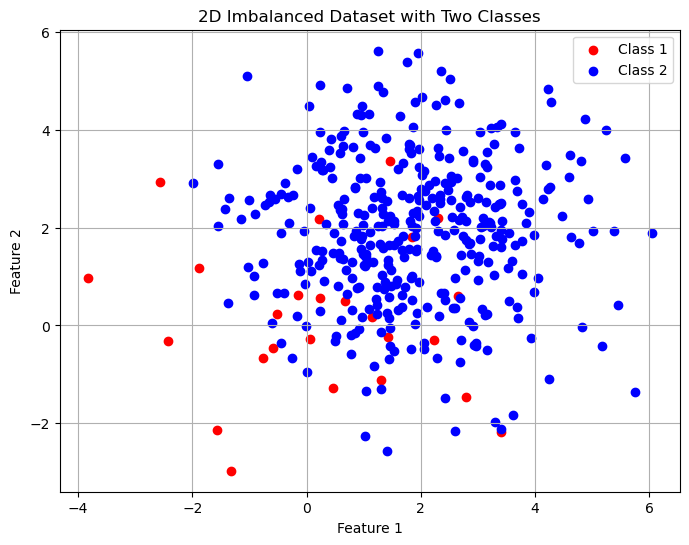

In [14]:
np.random.seed(42)

n_samples_1 = 25  
n_samples_2 = 375  
centers = [(0, 0), (2, 2)]  
cluster_std = [1.5, 1.5]  

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

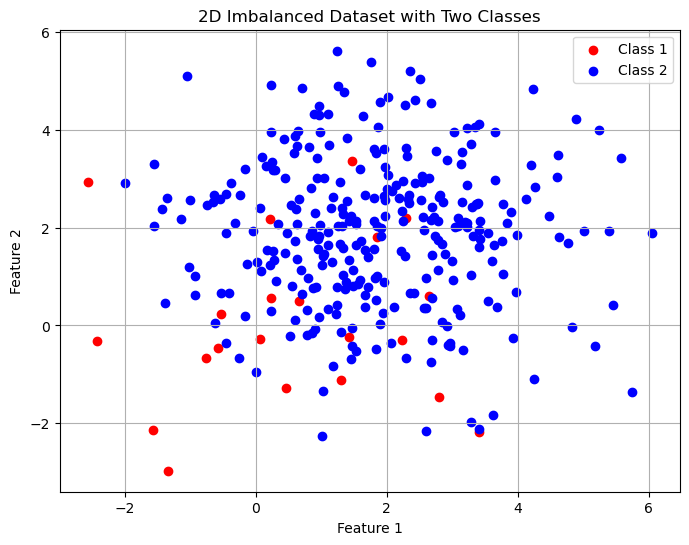

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

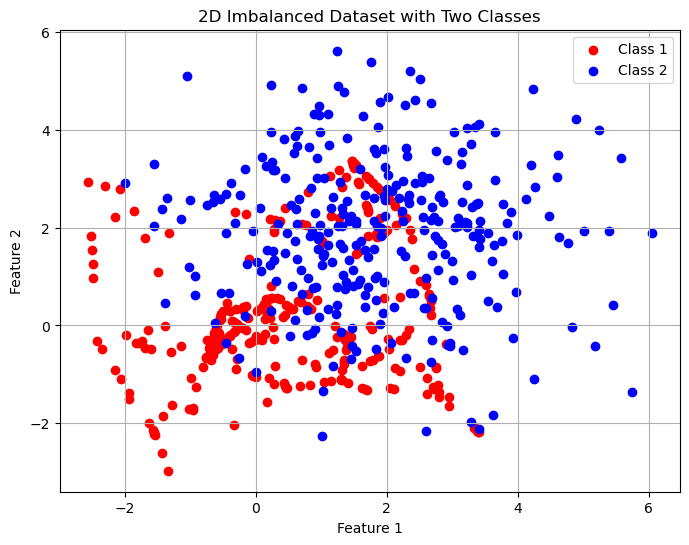

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled_smote[y_resampled_smote == 0][:, 0], X_resampled_smote[y_resampled_smote == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled_smote[y_resampled_smote == 1][:, 0], X_resampled_smote[y_resampled_smote == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()